# illustrates the use of the `proxy`, `analogs` and `scalar_plot` classes

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import xarray as xray 
except: 
    import xray
import matplotlib.pyplot as plt

### import the development version of paleopy

In [2]:
import sys

In [3]:
sys.path.insert(0, '../')

In [4]:
from paleopy import proxy 
from paleopy import analogs
from paleopy.plotting import scalar_plot

### example 1: defines one proxy

#### defines the folder where the JSON files are (for the datasets) and where to save the proxy JSON files

In [5]:
djsons = '../jsons/'
pjsons = '../jsons/proxies'

#### instantiates a proxy instance

In [13]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True, \
        method = 'quintiles')

#### find the analogs, calls the internal functions necessary to get there

In [14]:
p.find_analogs()

### now we can print the information about the proxy and the derived information related to the extraction

### those are the extracted analog years

In [15]:
p.analog_years

array([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype=int32)

### `analogs` is an attribute of the proxy: it's a `pandas` dataframe containing info about the analog years 

In [16]:
p.analogs

,sst,anomalies,d_sst,d_anomalies,cat,weights
time,,,,,,
1982-02-15,26.849999,0.196222,27.308039,0.638992,WA,0.156455
1997-02-15,27.416666,0.762889,27.416666,0.747619,WA,0.128005
1999-02-15,27.466666,0.812889,27.405594,0.736547,WA,0.130905
2000-02-15,27.373333,0.719556,27.281725,0.612678,WA,0.163346
2001-02-15,27.356666,0.702889,27.234522,0.565475,WA,0.157625
2006-02-15,27.373333,0.719556,27.098509,0.429462,WA,0.122003
2009-02-15,27.539999,0.886222,27.173568,0.504521,WA,0.141661


### Adding `outfile=True` creates the json file containing the proxy information, with filename `self.pfname`

In [17]:
p.proxy_repr(pprint=True, outfile=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.030535947029886677, 'intercept': -60.965016377755163}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15645480307020584, 0.12800536294956205, 0.13090508326029401, 0.16334634614636281, 0.15762466128135916, 0.1220029495538857, 0.1416607937383304]
}


In [18]:
!ls -lt ../jsons/proxies/Rarotonga.json

-rw-r--r--  1 nicolasf  staff  771 Apr 29 16:11 ../jsons/proxies/Rarotonga.json


### plot the seasonal time-series of anomalies and indicates the analog years

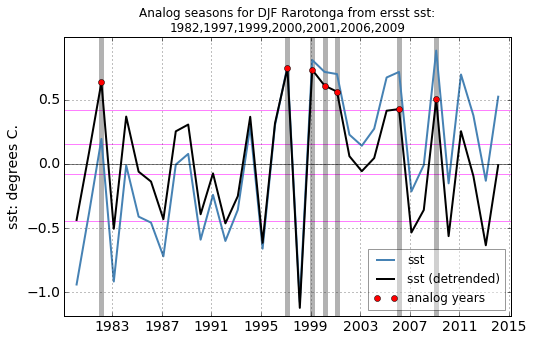

In [19]:
f = p.plot_season_ts()

### instantiate the analogs class with the proxy object and the dataset + variable to composite

In [20]:
compos = analogs(p, 'ncep', 'hgt_1000').composite()

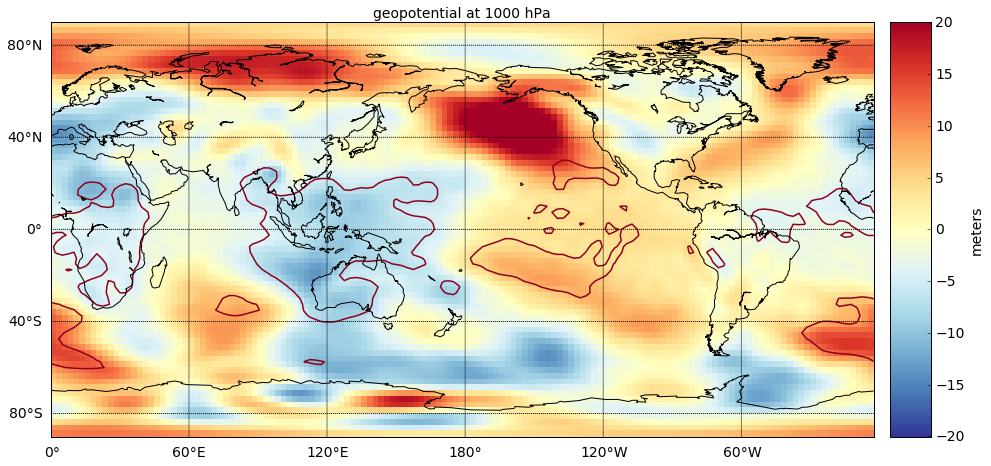

In [21]:
f = scalar_plot(compos, test=0.1).plot(subplots=False)

In [22]:
compos = analogs(p, 'ersst', 'sst').composite()

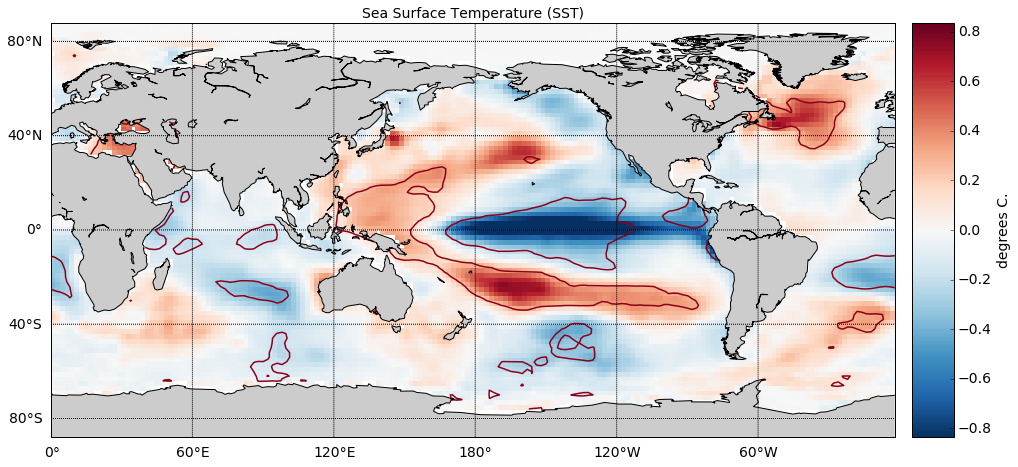

In [23]:
f = scalar_plot(compos, test=0.1).plot(subplots=False)

#### now maps: global domain, Equidistant Cylindrical projection, significance level 90%

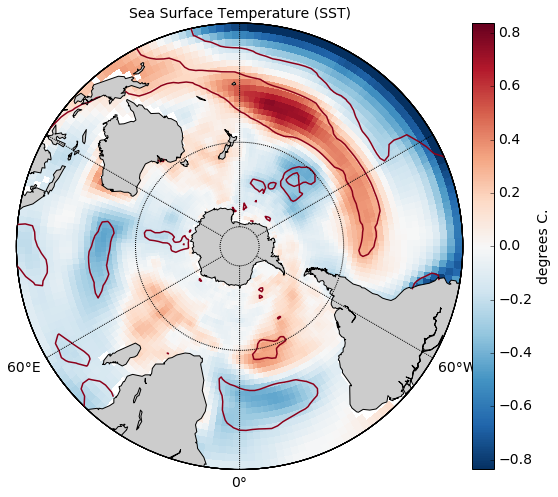

In [24]:
f = scalar_plot(compos, test=0.1, proj='spstere').plot(subplots=False)

#### a smaller domain (NZ)

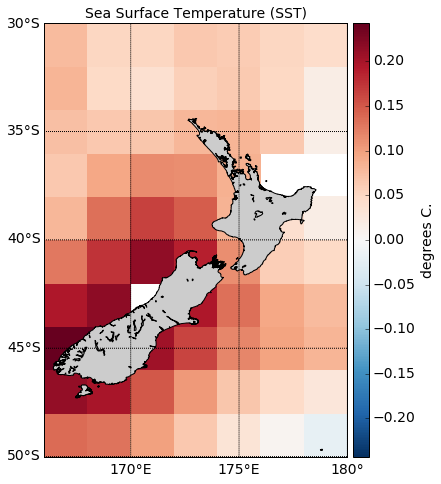

In [25]:
f = scalar_plot(compos, test=0.1, proj='cyl', domain=[165, 180, -50., -30], res='h').plot(subplots=False)

#### now one plot per year in the analog sample

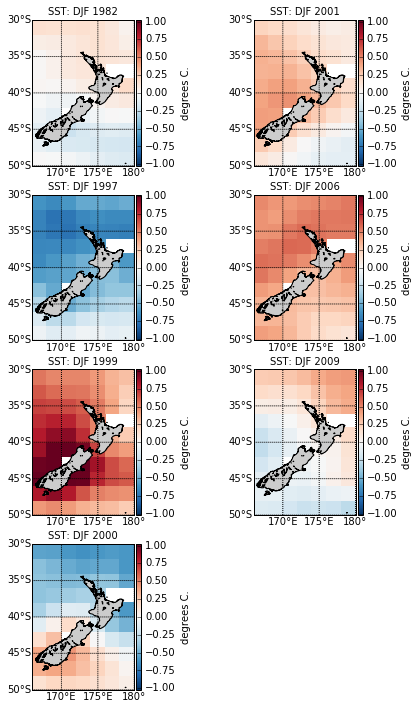

In [26]:
f = scalar_plot(compos, test=0.1, proj='cyl', domain=[165, 180, -50., -30], res='h').plot(subplots=True)

### Tmean composite from VCSN

In [28]:
compos = analogs(p, 'vcsn', 'TMean').composite()

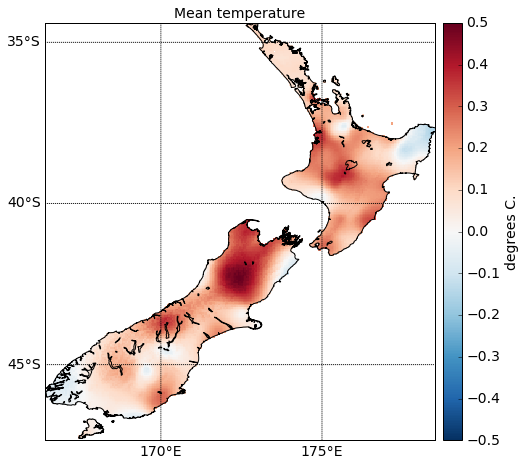

In [29]:
f = scalar_plot(compos, test=0.1, proj='cyl', res='h', vmin=-0.5, vmax=0.5).plot(subplots=False)

### saves to disk the xray Dataset containing the composite sample, anomalies and associated metadata

In [30]:
compos.dset

<xarray.Dataset>
Dimensions:              (agent: 11491, latitudes: 260, longitudes: 243, years: 7)
Coordinates:
  * longitudes           (longitudes) float64 166.4 166.4 166.5 166.5 166.6 ...
  * latitudes            (latitudes) float64 -47.35 -47.3 -47.25 -47.2 ...
  * agent                (agent) int64 3027 3106 3380 4782 5878 7317 7318 ...
  * years                (years) int32 1982 1997 1999 2000 2001 2006 2009
Data variables:
    mask                 (latitudes, longitudes) int64 1 1 1 1 1 1 1 1 1 1 1 ...
    composite_sample     (years, latitudes, longitudes) float64 nan nan nan ...
    composite_anomalies  (latitudes, longitudes) float64 nan nan nan nan nan ...
    weights              (years) float64 0.1565 0.128 0.1309 0.1633 0.1576 ...
    pvalues              (latitudes, longitudes) float64 nan nan nan nan nan ...

In [31]:
compos.save_to_file('/Users/nicolasf/Desktop/vcsn.nc')

In [32]:
!ncdump -h /Users/nicolasf/Desktop/vcsn.nc

netcdf vcsn {
dimensions:
	years = 7 ;
	latitudes = 260 ;
	longitudes = 243 ;
variables:
	double composite_sample(years, latitudes, longitudes) ;
		composite_sample:_FillValue = -999.9 ;
		composite_sample:missing_value = -999.9 ;
	double composite_anomalies(latitudes, longitudes) ;
		composite_anomalies:_FillValue = -999.9 ;
		composite_anomalies:missing_value = -999.9 ;
	double pvalues(latitudes, longitudes) ;
	double longitudes(longitudes) ;
		string longitudes:units = "degrees_east" ;
		string longitudes:long_name = "Longitudes" ;
		string longitudes:axis = "X" ;
	int years(years) ;
	double latitudes(latitudes) ;
		string latitudes:units = "degrees_north" ;
		string latitudes:long_name = "Latitudes" ;
		string latitudes:axis = "Y" ;
}
